<a href="https://colab.research.google.com/github/mathewchamberlain/MBA/blob/main/File_0_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0: Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint

# Step 1: Data Loading


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mathewchamberlain/MBA/main/adult.csv', na_values = '?')

# Step 2: Data Exploration

In [4]:
# Data types
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# Count missing values by column
df_dropped = df.dropna()

In [24]:
# write csv
df_dropped.to_csv('/content/drive/MyDrive/data_droppedna.csv')

In [12]:
# make statistical assessment as to whether income is differentially represented in null containing data
logik = df.isnull().values.any(axis = 1)
df['missingness'] = logik * 1
# write to csv
df.to_csv('/content/drive/MyDrive/data_missingness_annotated.csv')

In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,missingness
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


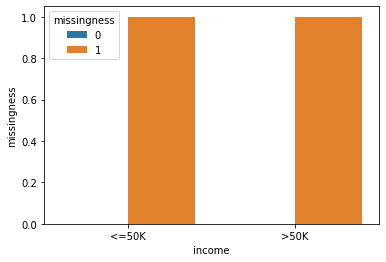

In [10]:
# compare df_dropped to df2; do we see changes in the distribution of income?
# df.groupby([''])[''].value_counts().plot(kind='bar')
import seaborn as sns

df3 = df.groupby(by = ['missingness'])['income'].sum().reset_index()

fig, ax = plt.subplots()

sns.barplot(ax = ax, data = df, x = 'income', y = 'missingness', hue = 'missingness')

plt.show()

In [13]:
# run lazy predict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# one hot encode the categorical variables
q = pd.get_dummies(df)

# split test and train
y = q['income_>50K']
q = q.drop('income_>50K', axis = 1)
q = q.drop('income_<=50K', axis = 1)

In [20]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# data = load_breast_cancer()
X = q
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [02:59<00:00,  6.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.79,0.79,0.86,1.60
NearestCentroid,0.76,0.79,0.79,0.77,0.22
BernoulliNB,0.78,0.78,0.78,0.79,0.25
AdaBoostClassifier,0.86,0.77,0.77,0.85,2.38
RandomForestClassifier,0.85,0.77,0.77,0.85,4.78
SGDClassifier,0.83,0.77,0.77,0.83,0.57
XGBClassifier,0.86,0.77,0.77,0.85,4.95
LogisticRegression,0.85,0.76,0.76,0.84,0.85
LinearSVC,0.85,0.76,0.76,0.84,12.44
